### Check Image

In [4]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [5]:
# We have 3, functions to extract the hsv feature, function to mask_image and also resize the images, and the last one is to show model results

def extract_hsv_features(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mean_hsv = np.mean(hsv, axis=(0, 1))
    return mean_hsv

def mask_image_and_resize(image, target_size=(256, 256)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_white = np.array([0, 0, 168])
    upper_white = np.array([172, 111, 255])

    whitemask = cv2.inRange(hsv, lower_white, upper_white)

    non_whitemask = cv2.bitwise_not(whitemask)

    # Define lower and upper bounds for grey colors
    lower_grey = np.array([0, 0, 100])
    upper_grey = np.array([172, 30, 255])

    greymask = cv2.inRange(hsv, lower_grey, upper_grey)

    non_whitemask_no_grey = cv2.bitwise_and(non_whitemask, cv2.bitwise_not(greymask))

    kernelOpen = np.ones((5, 5))
    kernelClose = np.ones((20, 20))
    maskOpen = cv2.morphologyEx(non_whitemask_no_grey, cv2.MORPH_OPEN, kernelOpen)
    maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)

    maskFinal = maskClose
    maskFinally = cv2.bitwise_and(hsv, hsv, mask=maskFinal)

    masked_image_resized = cv2.resize(maskFinally, target_size)

    return masked_image_resized

def test_model(image_path):
    input_image = cv2.imread(image_path)

    masked_image = mask_image_and_resize(input_image)

    # Display the original and masked images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Masked Image")
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

    # Extract HSV features from the masked image
    input_image_features = extract_hsv_features(masked_image)

    input_image_features_reshaped = input_image_features.reshape(1, -1)

    prediction = knn_classifier.predict(input_image_features_reshaped)

    print(f"Predicted class: {prediction}")

    class_probabilities = knn_classifier.predict_proba(input_image_features_reshaped)
    
    for class_label, prob in zip(knn_classifier.classes_, class_probabilities[0]):
        print(f"Probability for class {class_label}: {prob}")

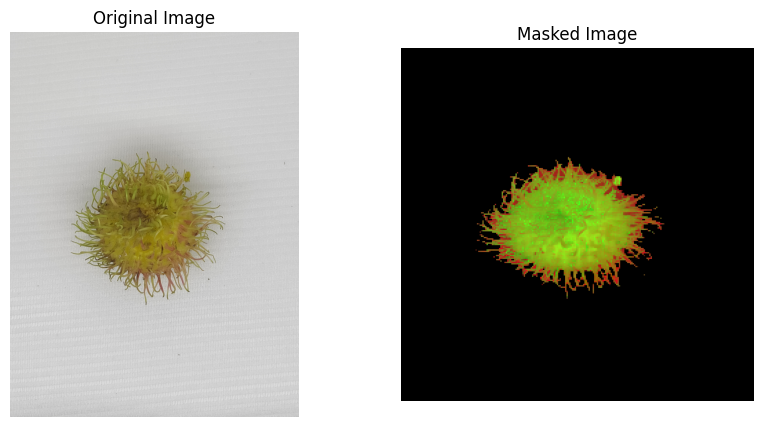

Predicted class: ['MENUJU MATANG']
Probability for class BUSUK: 0.0
Probability for class MATANG: 0.0
Probability for class MENTAH: 0.0
Probability for class MENUJU BUSUK: 0.0
Probability for class MENUJU MATANG: 1.0


/home/mizanul/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mizanul/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [6]:
# model_filename = 'best_knn_model.pkl'
model_filename = './model/best_knn_model.pkl'
knn_classifier = joblib.load(model_filename)

# Test the model with an example image
image_path_to_test = "./random_image/menuju_matang.jpg"
test_model(image_path_to_test)